# *Support Vector Machines - (from scratch - 2)*

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### *Hard Margin (works on linerly seprable data)*

*If the dataset can be linearly sperated, we can create two parallel hyperplane for each classes and contain each data points (support vectors) under these hyperplanes and our goal would be to maximize the distance between these two parallel hyperplane. The region between these two plane is called margin. The equations for both hyperplane is:*

* *wTX -b = -1*
* *wTX -b = 1*

*The distance between them is 2/||w|| and to maximize the distance, ||w|| should be minimum.*

*To prevent any data point falling inside margin we add the restriction,*

* *yi(wTXi -b) >= 1*

*where yi = ith row in the target and Xi = ith row in the X*

First five rows and col values 
X1 : 
 [[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]  
 y1 :
 [ 1  1 -1 -1  1]


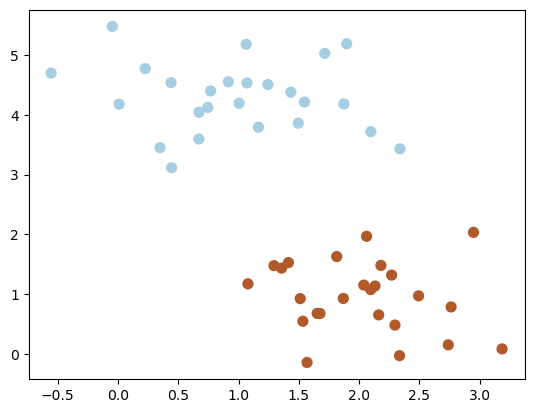

(50, 2)


In [11]:
X ,y = make_blobs(n_samples=50 ,centers = 2 , cluster_std=0.60 ,random_state=0 )
y = np.where(y<=0 , -1 , 1)
print("First five rows and col values \nX1 : \n",X[:5], " \n y1 :\n",y[:5])
plt.scatter(X[:,0] , X[:,1]  ,c=y , s=50 ,alpha=1 , cmap=plt.cm.Paired)
plt.plot()
plt.show()

print(X.shape)

In [8]:
class Hard_margin_SVM:
    def __init__(self ,C = 1.0,lr=0.001 , itrs = 1000 , lambda_param = 0.01):
        self.C = C
        self.itrs = itrs
        self.lr = lr
        self.lambda_param = lambda_param
        self.w = None
        self.b = None
        
    def fit(self,X , y):
        n_sample  ,n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.itrs):
            for i,x_i in enumerate(X):
                condition = y[i]*(np.dot(X[i],self.w) + self.b) >= 1
                if not condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i , y[i]))
                    self.b -= self.lr * (self.lambda_param*y[i])
                    
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                    
        # print(self.w , self.b)
                    
    def predict(self , X):
        # sign(x.w + b) -> (1,-1) -> x is the unknown features
        classification = np.sign(np.dot(np.array(X), self.w) + self.b)
        return classification


In [9]:
test_size = 0.2

X_train  ,y_train  = X[:-int(len(X)*test_size)] , y[:-int(len(X)*test_size)]

X_test , y_test = X[-int(len(X)*test_size):] , y[-int(len(X)*test_size):]

In [10]:

clf = Hard_margin_SVM()
clf.fit(X_train , y_train)

predictions  = clf.predict(X_test)

# print(predictions)
# print(y_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)*100
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))



SVM classification accuracy 100.0


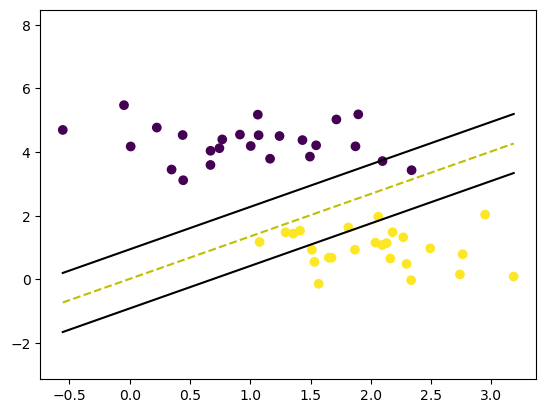

In [18]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        
        
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()

In [ ]:
class Soft_margin_SVM:
    def __init__(self , C = 1  ,lambda_param = 0.01 , itrs = 1000 , lr = 0.001):
        self.C = C
        self.lr = lr
        self.itrs = itrs
        self.lambda_param = lambda_param
        self.w = None
        self.b = None
        
    def fit(self , X,y):
        pass
        